# Downloading COVID Data From FloridaDisaster.ORG

### To Do

- [ ] **IMPORTANT**: Write the code that allows you to merge RWJ & Census data in
- [ ] Figure out why 3-19-20(PM) PDF returns null in the html file
- [ ] Revise the code that imports the html data so that it reads the column headers withou t (Consider using a list with all of the possible values of col head then if found append the list value to header.)
- [ ] *Optional*: Turn all of the processes into functions

### Completed
- [X] **IMPORTANT**: Fix this error '5-31-2020('
- [X] Fix the problem where before doh reported 0 as 0 and not missing, I can't use the data
- [X] Clean the changing column names at the text export stage
- [X] Figure out my headers are messed up
- [X] Why are there so many obs for 3/18
- [X] Extract the page range 12-25
- [X] Find the pages that contain the words "Coronavirus: All persons tested"
- [X] Extract just those two pages pdf 
- [X] Export individual files to txt for storage
- [X] Fix/find out why reports 3/19 - 3/24 are only 1kb and hold no data (There were 3 different page titles not 2)
- [X] **IMPORTANT**: THE LARGE NEGATIVE NUMBERS FOR DADE DO NOT SEEM TO BE CORRECT. FIND OUT WHAT IS GOING ON THERE
- [X] **IMPORTANT**: Something happens to the data at 7/6 after this point everything is wrong, why???



In [97]:
from selenium import webdriver
import os
import wget
import PyPDF2 as pdf
from PyPDF2 import PdfFileReader, PdfFileWriter
import time
import textract
from pathlib import Path
import re
import pandas as pd
import datetime

In [98]:
chrome_path = r"chromedriver.exe"

## Initializing driver element and finding 

In [99]:
driver = webdriver.Chrome(chrome_path)

In [100]:
driver.get('https://floridadisaster.org/covid19/covid-19-data-reports/')
title = driver.title
time.sleep(3)
result = driver.find_elements_by_xpath("//a[@href]")
report_months= ['June Reports', 'May Reports', 'April Reports', 'March Reports']
expanded = 0
if expanded == 0:
    for item in result:
        for months in report_months:
            if item.text.find(months) >= 0:
                item.click()
                expanded = 1
time.sleep(3)
result_full = driver.find_elements_by_xpath("//a[@href]")

Initializing the output paths

In [101]:
output_path = Path('C:\\Users\\chacr\\OneDrive\\Documents\\Coding\\Python\\USF\\COVID-19 Project\\Data\\PDF')
pdf_output_path= output_path.resolve()
pdf_extract_path = Path('C:\\Users\\chacr\\OneDrive\\Documents\\Coding\\Python\\USF\\COVID-19 Project\\Data\\Unclean PDF')
pdf_extract_path = pdf_extract_path.resolve()

In [102]:
pdf_output_path

WindowsPath('C:/Users/chacr/OneDrive/Documents/Coding/Python/USF/COVID-19 Project/Data/PDF')

## Downloads the PDF Files from FloridaDisaster.ORG

In [103]:
print('Starting Data Download')
link_counter = 0
download_counter = 0 
link_n = len(result_full) -152
download_list = []
for links in result_full:
    if links.text.find('Data Report') > 0:
        link_url = links.get_attribute('href')
        filename = wget.filename_from_url(link_url)
        if not os.path.exists(f'{pdf_output_path}/{filename}'):
            wget.download(link_url, out = f'{pdf_output_path}')
            download_counter += 1
            download_list.append
            print("Downloading", links.text)
        link_counter +=1
        print (f'{round((link_counter)*100/link_n,2)}% Complete')
print('Download of New Files Complete')
print(f'{download_counter} Files Created')

Starting Data Download
0.63% Complete
1.26% Complete
1.89% Complete
2.52% Complete
3.14% Complete
3.77% Complete
4.4% Complete
5.03% Complete
5.66% Complete
6.29% Complete
6.92% Complete
7.55% Complete
8.18% Complete
8.81% Complete
9.43% Complete
10.06% Complete
10.69% Complete
11.32% Complete
11.95% Complete
12.58% Complete
13.21% Complete
13.84% Complete
14.47% Complete
15.09% Complete
15.72% Complete
16.35% Complete
16.98% Complete
17.61% Complete
18.24% Complete
18.87% Complete
19.5% Complete
20.13% Complete
20.75% Complete
21.38% Complete
22.01% Complete
22.64% Complete
23.27% Complete
23.9% Complete
24.53% Complete
25.16% Complete
25.79% Complete
26.42% Complete
27.04% Complete
27.67% Complete
28.3% Complete
28.93% Complete
29.56% Complete
30.19% Complete
30.82% Complete
31.45% Complete
32.08% Complete
32.7% Complete
33.33% Complete
33.96% Complete
34.59% Complete
35.22% Complete
35.85% Complete
36.48% Complete
37.11% Complete
37.74% Complete
38.36% Complete
38.99% Complete
39.62

In [104]:
driver.close()

### Extracting the min and max page range for the COVID-19 Daily County Data

In [105]:
#turn into a function
def PdfPageExtract(input_path, output_path, page_num):
    import time
    import os
    import PyPDF2 as pdf
    from PyPDF2 import PdfFileReader, PdfFileWriter
    import textract
    import re
    pdf_extract_list = []
    date_fmt = r'(^.+\D)_(\d+)_(\d+)(\.pdf\Z)'
    print('Program Started')
    page_counter = 0
    today = datetime.date.today()
    file_num = len(os.listdir(input_path))
    file_exist_n =0
    progress = 0
    for files in os.listdir(input_path):
        if re.search(date_fmt, files ):
#             print(files) 
            mod_files = re.sub(date_fmt, r'\1 \2-\3-2020.pdf', files )
#             print(mod_files)    
            output = f'{output_path}/(7-11-20) Unclean Extract from {mod_files}'
        else:
            output = f'{output_path}/(7-11-20) Unclean Extract from {files}'
        progress += 1
        if os.path.exists(output):
            file_exist_n +=1
            print(f'{round((progress/file_num)* 100,2)}%', 'Complete', 'File exists')
            continue
        else:
            print('Creating the file', output)
            pdf_writer = PdfFileWriter()
            pdf_file = open(f'{input_path}/{files}','rb')
            pdfreader = PdfFileReader(pdf_file)
            num_pages = pdfreader.numPages
            if num_pages < page_num:
                up_limit = num_pages
            else:
                up_limit = page_num
            for pages in range(3, up_limit):
                page =  pdfreader.getPage(pages)  
                if page.extractText().find('COVID-19: All persons with tests reported') > 0 or page.extractText().find('Coronavirus: PUI testing by county') > 0 or page.extractText().find('Coronavirus: All persons tested') > 0 or page.extractText().find('Coronavirus: PUI testing by county') > 0 or page.extractText().find('Coronavirus: All') > 0:
                    pdf_writer.addPage(page) 
            
            with open(output, 'wb') as output_pdf:
                pdf_writer.write(output_pdf)
            pdf_extract_list.append(files)
            print(f'{round((progress/file_num)* 100,2)}% ', 'Complete' , 'File created')
    
    if file_exist_n == file_num:
        print('All Files Previously Created')
    else:
        print(f'{file_num -file_exist_n} New Files Created')
    return pdf_extract_list

page_limit = 26

PdfPageExtract(pdf_output_path, pdf_extract_path, page_limit)


Program Started
0.63% Complete File exists
1.27% Complete File exists
1.9% Complete File exists
2.53% Complete File exists
3.16% Complete File exists
3.8% Complete File exists
4.43% Complete File exists
5.06% Complete File exists
5.7% Complete File exists
6.33% Complete File exists
6.96% Complete File exists
7.59% Complete File exists
8.23% Complete File exists
8.86% Complete File exists
9.49% Complete File exists
10.13% Complete File exists
10.76% Complete File exists
11.39% Complete File exists
12.03% Complete File exists
12.66% Complete File exists
13.29% Complete File exists
13.92% Complete File exists
14.56% Complete File exists
15.19% Complete File exists
15.82% Complete File exists
16.46% Complete File exists
17.09% Complete File exists
17.72% Complete File exists
18.35% Complete File exists
18.99% Complete File exists
19.62% Complete File exists
20.25% Complete File exists
20.89% Complete File exists
21.52% Complete File exists
22.15% Complete File exists
22.78% Complete File e

[]

In [106]:
today = datetime.date.today()
file_list = PdfPageExtract(pdf_output_path, pdf_extract_path, page_limit)
print(f'List of PDF file extracts created {today}')
print('_'*100)
for files in file_list:
    print(files)

Program Started
0.63% Complete File exists
1.27% Complete File exists
1.9% Complete File exists
2.53% Complete File exists
3.16% Complete File exists
3.8% Complete File exists
4.43% Complete File exists
5.06% Complete File exists
5.7% Complete File exists
6.33% Complete File exists
6.96% Complete File exists
7.59% Complete File exists
8.23% Complete File exists
8.86% Complete File exists
9.49% Complete File exists
10.13% Complete File exists
10.76% Complete File exists
11.39% Complete File exists
12.03% Complete File exists
12.66% Complete File exists
13.29% Complete File exists
13.92% Complete File exists
14.56% Complete File exists
15.19% Complete File exists
15.82% Complete File exists
16.46% Complete File exists
17.09% Complete File exists
17.72% Complete File exists
18.35% Complete File exists
18.99% Complete File exists
19.62% Complete File exists
20.25% Complete File exists
20.89% Complete File exists
21.52% Complete File exists
22.15% Complete File exists
22.78% Complete File e

# Converting the PDFs to html files

In [107]:
from pathlib import Path

input_path = Path('C:\\Users\\chacr\\OneDrive\\Documents\\Coding\\Python\\USF\\COVID-19 Project\\Data\\Unclean PDF')
output_path = Path('C:\\Users\\chacr\\OneDrive\\Documents\\Coding\\Python\\USF\\COVID-19 Project\\Data\\html')
ip = input_path.resolve()
op = output_path.resolve()

In [108]:
import os
import pdftotree
import re
import sys
print('Program started')
html_created_list= []
file_n = len(os.listdir(ip))
file_ct = 0
file_exist_n =0
error_list = []
date1 = r'^.*(\d{2})-*(\d{2})-*(\d{4}).*\Z'
date2 = r'^.*(\d+)_(\d+)_(\d+).*\Z'
date3 = r'^.*(\d{4})-*(\d{2})-*(\d{2}).*\Z'
date4 = r'^.*\D(\d)\.(\d+)\.(\d+).*\Z'
date5 = r'^.*(\d{2})_(\d{2})\Z'
date6 = r'^.*-(\d{1})(\d{2})(\d{2})_.*\Z'
# date_format = r'(^.+)\D(\d-)(.*\Z)'
last_file_name = ''
for files in os.listdir(ip):
    file_ct += 1
    if re.search(date3,files):
#     test_name = re.sub(date3, r'html version of FL COVID Rep \2-\3-\1.html',files)
#     if 
        match = 1
        new_file_name = re.sub(date3, r'html version of FL COVID Rep \2-\3-\1.html',files)    
    elif re.search(date1,files):
        match = 2
        new_file_name = re.sub(date1, r'html version of FL COVID Rep \1-\2-\3.html',files)
    elif re.search(date2,files):
        match = 3        
        new_file_name = re.sub(date2, r'html version of FL COVID Rep 0\1-\2-\3.html',files)
    elif re.search(date4,files):        
        match = 4
        new_file_name = re.sub(date4, r'html version of FL COVID Rep 0\1-\2-2020.html',files)
    elif re.search(date5,files):
        match = 5
        new_file_name = re.sub(date5, r'html version of FL COVID Rep \1-\2-2020.html',files)
    elif re.search(date6,files):
        match = 6
        new_file_name = re.sub(date6, r'html version of FL COVID Rep 0\1-\2-2020.html',files)
        match = 7
    else:
        print("!" *36,'ERROR: Date Not found in File name',"!" *36)
        print('_'*100)
        print('Infile path:', ip)
        print('Outfile path:',op)
        print('Current File Path:',files)
        print('Current File name:',new_file_name)
        print('Prevous File name:',last_file_name)
        sys.exit()
        
    
    new_file_name = re.sub('20-20-0606', '06-06-2020', new_file_name)  
#     new_file_name = re.sub(date_format, r'\1-0\2\3', new_file_name)


    if last_file_name == new_file_name and new_file_name.find('PM') < 0:
        new_file_name = new_file_name.replace('.html', '(PM).html')
    in_file_path = f'{ip}/{files}'
    
    output_file_path = f'{op}\\{new_file_name}.html'
    if os.path.exists(output_file_path):
        file_exist_n +=1
        last_file_name = new_file_name
    else:
        html_created_list.append(output_file_path)
#         print('The infile path is:', in_file_path)
#         print('Creating the html file:', new_file_name, match)
        html = pdftotree.parse(in_file_path)
        with open(output_file_path,'w') as f:
            f.write(html)
        last_file_name = new_file_name

    print(f'{round((file_ct/file_n)*100)}% Complete') 
if file_exist_n == file_n:
    print('All Files Previously Created')
    print('Program Completed')
else:
    print(f'{file_n - file_exist_n} New Files Created')
    print('Files Created List')
    print('-'*100)
    for files in html_created_list:
        print(files)
    print('Program Completed')
    

Program started
1% Complete
1% Complete
2% Complete
3% Complete
3% Complete
4% Complete
4% Complete
5% Complete
6% Complete
6% Complete
7% Complete
8% Complete
8% Complete
9% Complete
9% Complete
10% Complete
11% Complete
11% Complete
12% Complete
13% Complete
13% Complete
14% Complete
15% Complete
15% Complete
16% Complete
16% Complete
17% Complete
18% Complete
18% Complete
19% Complete
20% Complete
20% Complete
21% Complete
22% Complete
22% Complete
23% Complete
23% Complete
24% Complete
25% Complete
25% Complete
26% Complete
27% Complete
27% Complete
28% Complete
28% Complete
29% Complete
30% Complete
30% Complete
31% Complete
32% Complete
32% Complete
33% Complete
34% Complete
34% Complete
35% Complete
35% Complete
36% Complete
37% Complete
37% Complete
38% Complete
39% Complete
39% Complete
40% Complete
41% Complete
41% Complete
42% Complete
42% Complete
43% Complete
44% Complete
44% Complete
45% Complete
46% Complete
46% Complete
47% Complete
47% Complete
48% Complete
49% Complet

## List of PDF File Extracts

In [109]:
for files in os.listdir(ip):
    print(files)

(7-11-20) Unclean Extract from 06062020state_reports_latest.pdf
(7-11-20) Unclean Extract from 06_13_2020state_reports_latest.pdf
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-03-16-1815.pdf
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-03-18-0955.pdf
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-03-19-0954.pdf
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-03-19-1653.pdf
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-03-20-1740-modified.pdf
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-03-21-1008.pdf
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-03-21-1731.pdf
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-03-22-0951.pdf
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-03-22-1828.pdf
(7-11-20) Unclean Extract from covid-19-data---daily-report-2020-03-23-0949.pdf
(7-11-20) Unclean Extract from covid-19-data---daily-report-2

## List of html Files


In [110]:
for files in os.listdir(op):
    print(files)

html version of FL COVID Rep 03-16-2020.html.html
html version of FL COVID Rep 03-18-2020.html.html
html version of FL COVID Rep 03-19-2020(PM).html.html
html version of FL COVID Rep 03-19-2020.html.html
html version of FL COVID Rep 03-20-2020.html.html
html version of FL COVID Rep 03-21-2020(PM).html.html
html version of FL COVID Rep 03-21-2020.html.html
html version of FL COVID Rep 03-22-2020(PM).html.html
html version of FL COVID Rep 03-22-2020.html.html
html version of FL COVID Rep 03-23-2020(PM).html.html
html version of FL COVID Rep 03-23-2020.html.html
html version of FL COVID Rep 03-24-2020(PM).html.html
html version of FL COVID Rep 03-24-2020.html.html
html version of FL COVID Rep 03-25-2020(PM).html.html
html version of FL COVID Rep 03-25-2020.html.html
html version of FL COVID Rep 03-26-2020(PM).html.html
html version of FL COVID Rep 03-26-2020.html.html
html version of FL COVID Rep 03-27-2020(PM).html.html
html version of FL COVID Rep 03-27-2020.html.html
html version of FL

### Need to fix at some point
>This code currentlyt does not work converting it to a function will allow for easier reuse

In [111]:
# def HtmlMaker(input_path, output_path, output_name):
#     import os
#     import pdftotree
#     import re
#     print('Program started')
#     file_n = len(os.listdir(input_path))
#     file_ct = 0
#     error_list = []
#     search_list = [r'^.*(\d+)-*(\d{2})-*(\d{4}).*\Z', r'^.*(\d+)_(\d+)_(\d+).*\Z', r'^.*(\d{4})-*(\d{2})-*(\d{2}).*\Z', r'^.*(\d)\.(\d{2})\.(\d+).*\Z', r'^.*(\d{2})_(\d{2})\Z']
#     result_list = [fr'html version of {output_name} \2-\3-\1.html', fr'html version of {output_name} \2-\3-\1.html', fr'html version of {output_name} \1-\2-\3.html', fr'html version of {output_name} \1-\2-\3.html', fr'html version of {output_name} \1-\2-2020.html']
#     last_file_name = ''

#     file_exist_n = 0
#     for files in os.listdir(input_path):
#         looking = 1
#         file_ct += 1
#         for searches in search_list:
#             counter = 0
#             while looking == 1:
#                 if re.search(searches,files):
#                     new_file_name = re.sub(searches, result_list[counter],files).replace('-20.html','-2020.html')
#                     looking = 0
#                     print(files, 'found it at', counter)
#                 counter += 1
#                 if counter  > 20:
#                     break
#         if last_file_name == new_file_name:
#             new_file_name = new_file_name.replace('.html', '(PM).html')
#         in_file_path = f'{input_path}/{files}'
#         try:
#             html = pdftotree.parse(in_file_path)
#             output_file_path = f'{output_path}\\{new_file_name}.html'
#             print(output_file_path)
#             if os.path.exists(output_file_path):
#                 file_exist_n +=1
#                 continue
#             else:
#                 print('I\'LL SEE YOU IN HELL!!!!')
#                 with open(output_file_path,'w') as f:
#                     f.write(html)
#                 last_file_name = new_file_name
#         except: 
#             error_list.append(files)
#         print(f'{round((file_ct/file_n)*100)}% Complete')
#     if file_exist_n == file_num:
#         print('All Files Previously Created')
#     else:
#         print(f'{file_n -file_exist_n} New Files Created')
            
            
# file_name = 'FL COVID Rep'
# HtmlMaker(ip, op, file_name)

## Importing the html files

In [112]:
import pandas as pd
import time
from bs4 import BeautifulSoup as soup
import os
from pathlib import Path
import datetime

In [113]:
today = datetime.date.today()
html_path = Path('C:\\Users\\chacr\\OneDrive\\Documents\\Coding\\Python\\USF\\COVID-19 Project\\Data\\html').resolve()
txt_path = Path('C:\\Users\\chacr\\OneDrive\\Documents\\Coding\\Python\\USF\\COVID-19 Project\\Data\\TXT2').resolve()

## Converting html to text and storing data



**NEED** To fix the promblem where 3-21 is being written with 3-19 & 3-20 included

In [114]:
import sys

header1 = ['COUNTY', 'AWAITING_TESTING', 'NEGATIVE', 'POSITIVE', 'PERCENT_POSITIVE', 'TOTAL_TESTED', 'FILE_NAME']
header1a = ['COUNTY', 'AWAITING_TESTING', 'NEGATIVE', 'POSITIVE',  'TOTAL_TESTED','PERCENT_POSITIVE', 'FILE_NAME']
header2 = ['COUNTY', 'AWAITING_TESTING', 'NEGATIVE', 'POSITIVE', 'INCONCLUSIVE',  'TOTAL_TESTED', 'PERCENT_POSITIVE','FILE_NAME']
header3 = ['COUNTY', 'AWAITING_TESTING', 'INCONCLUSIVE', 'NEGATIVE', 'POSITIVE', 'PERCENT_POSITIVE', 'TOTAL_TESTED','FILE_NAME']
files_w2 =[]
final_df = pd.DataFrame(columns=header1)
file_counter = 0
file_len_error = []
for files in os.listdir(html_path):
    file_path = f'{html_path}/{files}'
    file =open(file_path,'r')
    df = pd.DataFrame()
    file_n = len(os.listdir(html_path))
    page_soup = soup(file, 'lxml')
    table_soup = page_soup.findAll("table")
    row_counter = 0
    head_use = 999
    for tables in range(0, len(table_soup)):
        table_html = table_soup[tables]
#         print(files)
        for row in table_html.findAll('tr'):
            data_written = 0
            row_length = len(row)
            counter = 1
            data_list = []
            for col in row.findAll('td'):
                
                if row_counter == 0:
                    data_list.append(col.text.replace(' ', '_').upper())
                
                else:
                    data_list.append(col.text.replace(',','').replace('%',''))
                
                if len(data_list) == row_length:     
                    data_list.append(files.replace('.html','').strip('\n'))     
                    if len(data_list) == 7:
                        if row_counter == 0 and file_counter < 4:
                            if files.find("03-20-2020") >= 0:
                                df = pd.DataFrame(columns=header1a)
                            else:
                                df = pd.DataFrame(columns=header1)
                            head_use = 1
                        
                        elif data_written == 0 and row_counter > 0 and data_list[0] != 'County' and len(data_list[0]) != 0 and data_list[0].find('or by mai') < 0:
                            if files.find("03-20-2020") >= 0:
                                data = pd.DataFrame([data_list], columns = header1a)
                            else:
                                data = pd.DataFrame([data_list], columns = header1)
                            df = pd.concat([df,data])
                            data_written = 1

                    elif len(data_list) > 7:
                        if row_counter == 0 and file_counter < 13 and file_counter > 3:
                            df = pd.DataFrame(columns=header2)
                            files_w2.append(files)
                            head_use = 2             
                        elif row_counter == 0:
                            df = pd.DataFrame(columns=header3)
                            head_use = 3
                            
                
                            
                        if data_written == 0 and row_counter > 0 and data_list[0] != 'County' and len(data_list[0]) != 0 and data_list[0].find('or by mai') < 0:
                            if files.replace('.html','').strip('\n').find('html version of FL COVID Rep 03-24-2020') >= 0 and len(data_list) == 9:
                                
                                data_list.pop(4)
                                
                                if head_use == 2:
                                    data = pd.DataFrame([data_list], columns = header2)
                                    df = pd.concat([df,data])
                                    data_written = 1
                                else:
                                    data = pd.DataFrame([data_list], columns = header3)
                                    df = pd.concat([df,data])
                                    data_written = 1

                            else:
    
                                if len(data_list)== 9 and file_counter > 10 and file_counter <36:
                                    data_list.pop(3) # This is needed because the hmtl adds a column before inconclusive for files 12-35
                                if data_written == 0 and head_use == 2:
                                    data = pd.DataFrame([data_list], columns = header2)
                                    df = pd.concat([df,data])
                                    data_written = 1
                                elif data_written == 0 :
    #                                     print(file_counter, data_list)
                                    data = pd.DataFrame([data_list], columns = header3)
                                    df = pd.concat([df,data])
                                    data_written = 1
                                else:
                                    print('No data written Data lines =', data_list)
                    
        
            row_counter += 1
#     outfile = f'{txt_path}/{files.replace("html.html", "txt").replace("html version", "txt version")}'
    outfile1 = f'{txt_path}/{files.replace("html.html", "csv").replace("html version", "txt version")}'
    file_counter +=1
#     df.to_csv(outfile,sep='\t', index = False)
    
    try:
        if df['COUNTY'].count() > 69 or df['COUNTY'].count() < 57 :
            n = df['COUNTY'].count()
            file_len_error.append(file)
            print('\n'*5)
            print('ERORR '*10)
            print('df OBS Count Flag!!!', files)
            print(f'There are {n} observations in this file')
            print('ERORR '*10)
            print('\n'*5)
        else:
            final_df = final_df.append(df, ignore_index=True)
            df.to_csv(outfile1,sep=',', index = False)
    except KeyError:
        print('\n'*5)
        print('ERORR '*10)
        print('file', files, 'has no data.')
        print('ERORR '*10)
        print('\n'*5)
        file_len_error.append(file)
    print(f'{round((file_counter/file_n)*100,3)}% Complete')


    

0.633% Complete
1.266% Complete






ERORR ERORR ERORR ERORR ERORR ERORR ERORR ERORR ERORR ERORR 
file html version of FL COVID Rep 03-19-2020(PM).html.html has no data.
ERORR ERORR ERORR ERORR ERORR ERORR ERORR ERORR ERORR ERORR 






1.899% Complete
2.532% Complete
3.165% Complete
3.797% Complete






ERORR ERORR ERORR ERORR ERORR ERORR ERORR ERORR ERORR ERORR 
df OBS Count Flag!!! html version of FL COVID Rep 03-21-2020.html.html
There are 18 observations in this file
ERORR ERORR ERORR ERORR ERORR ERORR ERORR ERORR ERORR ERORR 






4.43% Complete
5.063% Complete
5.696% Complete
6.329% Complete
6.962% Complete
7.595% Complete
8.228% Complete
8.861% Complete
9.494% Complete
10.127% Complete
10.759% Complete
11.392% Complete
12.025% Complete
12.658% Complete
13.291% Complete
13.924% Complete
14.557% Complete
15.19% Complete
15.823% Complete
16.456% Complete
17.089% Complete
17.722% Complete
18.354% Complete
18.987% Complete
19.62% Complete
20.253% Complete
20.886% Complete
21.519%

In [115]:
for files in files_w2:
    print(files)

html version of FL COVID Rep 03-21-2020(PM).html.html
html version of FL COVID Rep 03-22-2020(PM).html.html
html version of FL COVID Rep 03-22-2020.html.html
html version of FL COVID Rep 03-23-2020(PM).html.html
html version of FL COVID Rep 03-23-2020.html.html
html version of FL COVID Rep 03-24-2020(PM).html.html
html version of FL COVID Rep 03-24-2020.html.html


## QA Check on Data Import Process

In [116]:
print(f'There are {len(file_len_error)} html files with too few or too many observations')
print('File Names:')
print('-'*92)
for files in file_len_error:
    print(files.name)
print('NOTE: Files listed here will not appear in the final dataset')    


There are 2 html files with too few or too many observations
File Names:
--------------------------------------------------------------------------------------------
C:\Users\chacr\OneDrive\Documents\Coding\Python\USF\COVID-19 Project\Data\html/html version of FL COVID Rep 03-19-2020(PM).html.html
C:\Users\chacr\OneDrive\Documents\Coding\Python\USF\COVID-19 Project\Data\html/html version of FL COVID Rep 03-21-2020.html.html
NOTE: Files listed here will not appear in the final dataset


Exporting the COVID Dataset

Setting Paths for output

In [117]:
qa_path = '../data/QA Checks/'
graphics_path = '../Graphics/'
data_path = '../data/'

In [134]:
final_df.loc[final_df['COUNTY'].str.contains('Dade') ,'COUNTY'] = 'Miami-Dade'

In [135]:
final_df.loc[final_df['COUNTY'].str.contains('Dade')]

,COUNTY,AWAITING_TESTING,NEGATIVE,POSITIVE,PERCENT_POSITIVE,TOTAL_TESTED,FILE_NAME,INCONCLUSIVE
1,Miami-Dade,174,90,25,9,289,html version of FL COVID Rep 03-16-2020,NaN
59,Miami-Dade,148,156,76,20,380,html version of FL COVID Rep 03-18-2020,NaN
118,Miami-Dade,123,204,86,21,413,html version of FL COVID Rep 03-19-2020,NaN
177,Miami-Dade,113,838,123,13,961,html version of FL COVID Rep 03-20-2020,NaN
243,Miami-Dade,97,1211,169,12,1381,html version of FL COVID Rep 03-21-2020(PM),1
...,...,...,...,...,...,...,...,...
10376,Miami-Dade,181,365488,67713,16,433978,html version of FL COVID Rep 07-13-2020,777
10445,Miami-Dade,181,370243,69803,16,440839,html version of FL COVID Rep 07-14-2020,793
10514,Miami-Dade,180,376451,72317,16,449593,html version of FL COVID Rep 07-15-2020,825
10583,Miami-Dade,182,385906,75425,16,462196,html version of FL COVID Rep 07-16-2020,865


In [151]:
final_df.to_excel(f'{data_path}Final COVID Only Dataset (Pre-Manipulation) 7-13-20.xlsx', index=False)

Importing the COVID Dataset

In [152]:
import pandas as pd
mod_df = final_df.loc[~final_df['COUNTY'].str.contains('Total')].copy()

In [153]:
# mod_df = pd.read_excel(f'{data_path}Final COVID Only Dataset (Pre-Manipulation) 7-13-20.xlsx')
mod_df = mod_df.loc[~mod_df['COUNTY'].str.contains('Total')]

In [154]:
mod_df = mod_df.loc[~mod_df['COUNTY'].str.contains('Total')]
mod_df[mod_df['COUNTY']=='Total']

,COUNTY,AWAITING_TESTING,NEGATIVE,POSITIVE,PERCENT_POSITIVE,TOTAL_TESTED,FILE_NAME,INCONCLUSIVE


In [155]:
mod_df['COUNTY'].nunique()

68

Number of times COUNTY contained 'Sumter'

In [156]:
# pd.value_counts(mod_df['COUNTY'].str.contains('Sumter')).to_frame()

# Data Manipulation

In [157]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [158]:
mod_df['NEGATIVE'] = pd.to_numeric(mod_df['NEGATIVE'])
mod_df['POSITIVE'] = pd.to_numeric(mod_df['POSITIVE'])
mod_df['PERCENT_POSITIVE'] = pd.to_numeric(mod_df['PERCENT_POSITIVE'])
mod_df['TOTAL_TESTED'] = pd.to_numeric(mod_df['TOTAL_TESTED'])
mod_df['INCONCLUSIVE'] = pd.to_numeric(mod_df['INCONCLUSIVE'])
mod_df['AWAITING_TESTING'] = pd.to_numeric(mod_df['AWAITING_TESTING'])

In [159]:
mod_df = mod_df.fillna(0)
mod_df['FILE_NAME'] =  mod_df['FILE_NAME'].str.strip('\n')
mod_df['DATE'] = pd.to_datetime(mod_df['FILE_NAME'].str[29:39], errors='ignore')
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10565 entries, 0 to 10719
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   COUNTY            10565 non-null  object        
 1   AWAITING_TESTING  10565 non-null  float64       
 2   NEGATIVE          10565 non-null  int64         
 3   POSITIVE          10565 non-null  float64       
 4   PERCENT_POSITIVE  10565 non-null  float64       
 5   TOTAL_TESTED      10565 non-null  int64         
 6   FILE_NAME         10565 non-null  object        
 7   INCONCLUSIVE      10565 non-null  float64       
 8   DATE              10565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 825.4+ KB


In [160]:
mod_df['DAY_OF_WEEK'] = mod_df['DATE'].dt.weekday

## Evaluation of the number of times a date appears in the dataset

In [161]:
print(pd.value_counts(mod_df['DATE']).to_frame(name='Frequency of Each Date in the Data set').head(10))
print(pd.value_counts(mod_df['DATE']).to_frame(name='Frequency of Each Date in the Data set').tail(10))
print('NOTE: Each Date should only appear max = 136 times min = 57 times')

            Frequency of Each Date in the Data set
2020-03-27                                     136
2020-04-10                                     136
2020-03-24                                     136
2020-04-07                                     136
2020-04-20                                     136
2020-04-24                                     136
2020-03-29                                     136
2020-04-02                                     136
2020-04-15                                     136
2020-04-16                                     136
            Frequency of Each Date in the Data set
2020-06-24                                      68
2020-04-28                                      68
2020-06-11                                      68
2020-05-29                                      68
2020-07-12                                      68
2020-03-21                                      66
2020-03-20                                      66
2020-03-19                     

### Frequency of county n

In [162]:
print(pd.value_counts(mod_df['COUNTY']).to_frame(name='Frequency of County Name Head').head(10))
print(pd.value_counts(mod_df['COUNTY']).to_frame(name='Frequency of County Name Tail').tail(10))

              Frequency of County Name Head
Martin                                  156
Pasco                                   156
Okeechobee                              156
Indian River                            156
Alachua                                 156
Lafayette                               156
Washington                              156
Desoto                                  156
Santa Rosa                              156
Flagler                                 156
           Frequency of County Name Tail
Jefferson                            153
Hamilton                             153
Taylor                               153
Holmes                               153
Wakulla                              153
Madison                              153
Highlands                            153
Calhoun                              153
Liberty                              147
Glades                               147


In [163]:
county_n = mod_df['COUNTY'].value_counts()
print(county_n.value_counts().to_frame(name='Distribution of County Frequency'))
county_n.to_csv('Number of Obs Per County 7-11-20.txt', sep='\t')

     Distribution of County Frequency
156                                57
153                                 8
147                                 2
155                                 1


comparing the number of different lengths for filename there are

## Data Quality Check

In [164]:
mod_df['len_file_name'] = pd.value_counts(mod_df['FILE_NAME'].apply(len))
pd.value_counts(mod_df['FILE_NAME'].apply(len)).to_frame(name='Freq of File Lengths')

,Freq of File Lengths
39,8123
43,2306
38,136


In [165]:
pd.value_counts(mod_df['FILE_NAME'].str.contains('PM')).to_frame()

,FILE_NAME
False,8259
True,2306


In [166]:
mod_df['FILE_NAME_LEN'] = mod_df.FILE_NAME.apply(len)

In [167]:
mod_df.sort_values(by=['FILE_NAME_LEN'], inplace=True)

In [168]:
mod_df[["FILE_NAME", 'FILE_NAME_LEN']].head(10)

,FILE_NAME,FILE_NAME_LEN
7982,html version of FL COVID Rep 06-1-2020,38
8752,html version of FL COVID Rep 06-2-2020,38
8751,html version of FL COVID Rep 06-2-2020,38
8750,html version of FL COVID Rep 06-2-2020,38
8749,html version of FL COVID Rep 06-2-2020,38
8748,html version of FL COVID Rep 06-2-2020,38
8747,html version of FL COVID Rep 06-2-2020,38
8746,html version of FL COVID Rep 06-2-2020,38
8745,html version of FL COVID Rep 06-2-2020,38
8744,html version of FL COVID Rep 06-2-2020,38


In [169]:
mod_df[["FILE_NAME", 'FILE_NAME_LEN']].tail(10)

,FILE_NAME,FILE_NAME_LEN
4422,html version of FL COVID Rep 04-21-2020(PM),43
4424,html version of FL COVID Rep 04-21-2020(PM),43
4425,html version of FL COVID Rep 04-21-2020(PM),43
4426,html version of FL COVID Rep 04-21-2020(PM),43
4427,html version of FL COVID Rep 04-21-2020(PM),43
4428,html version of FL COVID Rep 04-21-2020(PM),43
4429,html version of FL COVID Rep 04-21-2020(PM),43
4430,html version of FL COVID Rep 04-21-2020(PM),43
4423,html version of FL COVID Rep 04-21-2020(PM),43
1752,html version of FL COVID Rep 04-02-2020(PM),43


In [170]:
mod_df[mod_df['FILE_NAME_LEN']== 39].filter(['FILE_NAME_LEN','FILE_NAME']).head(10)

,FILE_NAME_LEN,FILE_NAME
7140,39,html version of FL COVID Rep 05-27-2020
7139,39,html version of FL COVID Rep 05-27-2020
7120,39,html version of FL COVID Rep 05-26-2020
7121,39,html version of FL COVID Rep 05-26-2020
7141,39,html version of FL COVID Rep 05-27-2020
7142,39,html version of FL COVID Rep 05-27-2020
7146,39,html version of FL COVID Rep 05-27-2020
7144,39,html version of FL COVID Rep 05-27-2020
7145,39,html version of FL COVID Rep 05-27-2020
7147,39,html version of FL COVID Rep 05-27-2020


In [171]:
mod_df[mod_df['FILE_NAME_LEN']== 39].filter(['FILE_NAME_LEN','FILE_NAME']).tail(10)

,FILE_NAME_LEN,FILE_NAME
3520,39,html version of FL COVID Rep 04-14-2020
3526,39,html version of FL COVID Rep 04-14-2020
3525,39,html version of FL COVID Rep 04-14-2020
3524,39,html version of FL COVID Rep 04-14-2020
3527,39,html version of FL COVID Rep 04-14-2020
3522,39,html version of FL COVID Rep 04-14-2020
3521,39,html version of FL COVID Rep 04-14-2020
3673,39,html version of FL COVID Rep 04-15-2020
3672,39,html version of FL COVID Rep 04-15-2020
3523,39,html version of FL COVID Rep 04-14-2020


## Creating the New Case And Negative Variables

In [172]:
mod_df.sort_values(by=["COUNTY", "DATE"], inplace=True)

In [173]:
mod_df['LAST_POS_COUNT'] = mod_df['POSITIVE'].shift(1)
mod_df['LAST_COUNTY'] = mod_df['COUNTY'].shift(1)
mod_df['LAST_NEG_COUNT'] = mod_df['NEGATIVE'].shift(1)
mod_df['NEW_NEGATIVES'] = mod_df['NEGATIVE'] - mod_df['LAST_NEG_COUNT']
mod_df['NEW_CASES'] = mod_df['POSITIVE'] - mod_df['LAST_POS_COUNT']
mod_df.loc[mod_df['COUNTY'] != mod_df["LAST_COUNTY"], 'NEW_CASES' ] = ''
mod_df.loc[mod_df['COUNTY'] != mod_df["LAST_COUNTY"], 'NEW_NEGATIVES' ] = ''

mod_df['NEW_CASES'] = pd.to_numeric(mod_df['NEW_CASES'])
mod_df['NEW_NEGATIVES'] = pd.to_numeric(mod_df['NEW_NEGATIVES'])
# mod_df.drop(labels=['LAST_POS_COUNT', 'LAST_COUNTY','LAST_NEG_COUNT'], inplace=True, axis=1)


In [180]:
dade = mod_df.loc[mod_df['COUNTY']=='Miami-Dade']
dade.to_csv(f'{qa_path}Dade data.csv', index=False)
sumter = mod_df.loc[mod_df['COUNTY']=='Broward']
sumter.to_csv(f'{qa_path}Broward data.csv', index=False)
print(dade[['NEW_CASES', 'LAST_POS_COUNT', 'POSITIVE', 'DATE']].head(30))
print(dade[['NEW_CASES', 'LAST_POS_COUNT', 'POSITIVE', 'DATE']].tail(30))
# for cases in dade['NEW_CASES']:
#     print(cases, )

KeyError: "['LAST_POS_COUNT'] not in index"

In [175]:
mod_df['TOTAL_TESTED'] = mod_df['NEGATIVE']  +  mod_df['POSITIVE']  + mod_df['INCONCLUSIVE'] + mod_df['AWAITING_TESTING']

In [176]:
# os.getcwd()
# os.listdir('../')

In [177]:
mod_df.columns

Index(['COUNTY', 'AWAITING_TESTING', 'NEGATIVE', 'POSITIVE',
       'PERCENT_POSITIVE', 'TOTAL_TESTED', 'FILE_NAME', 'INCONCLUSIVE', 'DATE',
       'DAY_OF_WEEK', 'len_file_name', 'FILE_NAME_LEN', 'LAST_POS_COUNT',
       'LAST_COUNTY', 'LAST_NEG_COUNT', 'NEW_NEGATIVES', 'NEW_CASES'],
      dtype='object')

In [178]:
mod_df.drop(labels=['len_file_name', 'FILE_NAME_LEN', 'LAST_POS_COUNT', 'LAST_NEG_COUNT', 'LAST_COUNTY',], axis = 1, inplace = True)

In [182]:
# mod_df.to_csv(f'{data_path}Final COVID Only Dataset {today.month}-{today.day}-{today.year} (CLEAN).txt', sep='\t', index=False)
mod_df.to_excel(f'{data_path}Final COVID Only Dataset {today.month}-{today.day}-{today.year} (CLEAN).xlsx',  index=False)

In [ ]:
sns.style.available

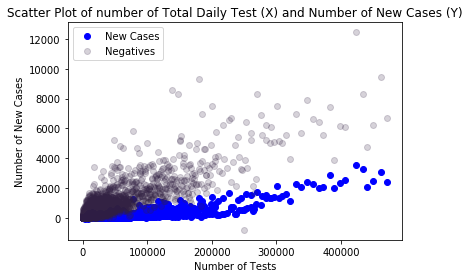

In [183]:
plt.style.use('seaborn-muted')
plt.plot(mod_df['TOTAL_TESTED'],mod_df['NEW_CASES'],'bo', label='New Cases')
plt.plot(mod_df['TOTAL_TESTED'],mod_df['NEW_NEGATIVES'], color='#332244',marker='o', linestyle='' , label= 'Negatives', alpha=0.2)
plt.title('Scatter Plot of number of Total Daily Test (X) and Number of New Cases (Y)')
plt.xlabel('Number of Tests')
plt.ylabel('Number of New Cases')
plt.legend()
plt.show()

In [ ]:
mod_df['NEW_CASES'].hist(bins=[0,199,200,399, 400,1000,1001,5000,5001,10000])

In [ ]:
mod_df[['TOTAL_TESTED','COUNTY']].describe()

In [ ]:
mod_df.COUNTY.nunique()

### Verifying that the shift worked correctly

In [ ]:
mod_df[['NEGATIVE']].sum().to_frame()

In [ ]:
mod_df[['NEW_CASES']].sum().to_frame()

In [ ]:
mod_df.columns

In [ ]:
mod_df['NEW_CASES'].describe().to_frame()

In [ ]:
mod_df.filter(items=['NEW_CASES','COUNTY'], axis=1)

## Observations where the number of new cases is less than 0

In [ ]:
# Getting Counties with over 1000 cases reported in one day
high_case = mod_df[mod_df['NEW_CASES']> 1000]
high_case.sort_values(by='NEW_CASES', inplace=True, ascending =False)
print(high_case[['COUNTY', 'NEW_CASES' ,'DATE']].head(100))
top_100 = pd.DataFrame(high_case[['COUNTY', 'NEW_CASES' ,'DATE']].head(100))


In [ ]:
# County
pd.value_counts(high_case['COUNTY'].head(100)).to_frame(name="County")

In [ ]:
neg_case = mod_df[mod_df['NEW_CASES']< 0].copy()
neg_case.sort_values(by='NEW_CASES', inplace=True)
print(neg_case[['COUNTY', 'NEW_CASES' ,'DATE']].head(20))
print(neg_case[['COUNTY', 'NEW_CASES' ,'DATE']].tail(20))
neg_case.to_csv(f'{qa_path}Observation With Negative.csv' ,sep=',')

In [ ]:
pd.value_counts(neg_case.COUNTY)

In [ ]:
neg_c_freq = pd.DataFrame(neg_case.groupby('DATE')['COUNTY'].count())
neg_c_freq['COUNTY']
neg_c_freq['DATE'] = neg_c_freq.index
sns.barplot(x='DATE', y ='COUNTY',data =neg_c_freq )
plt.title('Number of Daily Negative Case By Date')
plt.ylabel('Frequency of Negative Values')

In [ ]:
mod_df

In [ ]:
mod_df[mod_df['NEW_CASES']< 0].describe()

In [ ]:
# mod_df.drop('FILE_NAME1', axis = 1, inplace=True)
mod_df.columns

# Messing around with matplotlib

In [ ]:
# plt.xkcd()
# plt.plot(mod_df['TOTAL_TESTED'],mod_df['NEW_CASES'],'bo', label='New Cases')
# plt.plot(mod_df['TOTAL_TESTED'],mod_df['NEW_NEGATIVES'], color='#332244',marker='o', linestyle='' , label= 'Negatives', alpha=0.2)
# plt.title('Scatter Plot of number of Total Daily Test (X) and Number of New Cases (Y)')
# plt.xlabel('Number of Tests')
# plt.ylabel('Number of New Cases')
# plt.legend()
# plt.savefig('plot.png')
# plt.show()

In [179]:
today.day

17